In [21]:
import os
import numpy as np

In [22]:
data_path = 'dataset'

# Get all non-hidden files and folders to list
categories = [item for item in os.listdir(data_path) if not item.startswith('.')]
print(categories)

labels = [i for i in range(len(categories))] #make lables 
print(labels)

#assign labels to each category
categories_dict = {'ae':0, 'u':1, 'a':2, 'e':3}
print (categories_dict)



['ae', 'u', 'a', 'e']
[0, 1, 2, 3]
{'ae': 0, 'u': 1, 'a': 2, 'e': 3}


In [23]:
import cv2
data = []
target = []

for category in categories:
    imgs_path = os.path.join(data_path, category) # join category and data path
    #print(imgs_path)
    img_names = os.listdir(imgs_path) #get images from each data path 
    #print(img_names)
    #print(category,"-----------------")
    
    #make path for each image
    for img_name in img_names :
        if img_name.startswith("._"):
            continue
        img_path = os.path.join(imgs_path, img_name)
        #print(img_path)
        
        img = cv2.imread(img_path,0) #in grey color
        img=cv2.resize(img,(8,8)) # convert to 8 x 8
        
        #add imgs to data and target 
        data.append(img)
        target.append(categories_dict[category])
        
        #cv2.imshow('LIVE',img)
        
        #k=cv2.waitKey(1000)
        #if(k==27):
            #break
#cv2.destroyAllWindows()

In [24]:
print(len(data),len(target))

270 270


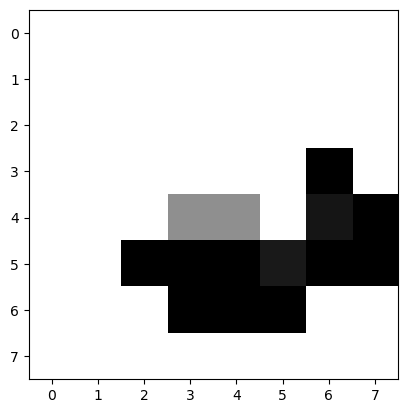

In [25]:
from matplotlib import pyplot as plt
plt.imshow(data[10],cmap = 'gray')

In [26]:
target[10]

0

In [27]:
data[132]

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255,   0,   0, 220, 255, 255, 255],
       [255,  21,   0,   0, 207, 255,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0, 255],
       [255, 255, 255, 255, 255,   0,   0, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [28]:
#reshape the array to 1d
data=np.array(data)
print('before resize:',data.shape)
data=data.reshape(data.shape[0],data.shape[1]*data.shape[2])
#data=data.reshape(270,8*8)
print('after resize:',data.shape)
target=np.array(target)

np.save('data',data)
np.save('target',target)

before resize: (270, 8, 8)
after resize: (270, 64)
